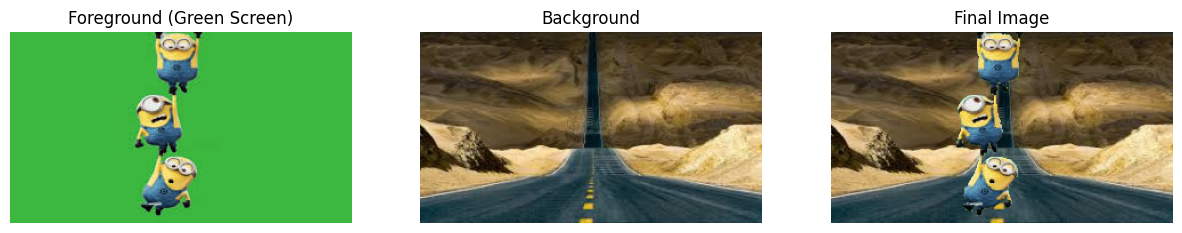

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the foreground (green screen image) and background image
foreground = cv2.imread('minion.jpeg')  # Green screen image
background = cv2.imread('road.jpeg')  # Background image

# Resize the background to match the size of the foreground
background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))

# Convert the foreground image to HSV color space for better color detection
hsv_foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2HSV)

# Define the green color range in HSV (Hue, Saturation, Value)
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Create a mask to detect green areas
green_mask = cv2.inRange(hsv_foreground, lower_green, upper_green)

# Invert the mask to get the non-green areas (the object)
mask_inv = cv2.bitwise_not(green_mask)

# Extract the object (non-green parts) from the foreground
foreground_object = cv2.bitwise_and(foreground, foreground, mask=mask_inv)

# Extract the background where the green screen was
background_part = cv2.bitwise_and(background, background, mask=green_mask)

# Combine the background part with the foreground object
final_image = cv2.add(foreground_object, background_part)

# Convert images to RGB (from BGR) for displaying with matplotlib
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

# Create a figure to display all images: Foreground, Background, and Final Result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the foreground image
ax[0].imshow(foreground_rgb)
ax[0].axis('off')
ax[0].set_title('Foreground (Green Screen)')

# Display the background image
ax[1].imshow(background_rgb)
ax[1].axis('off')
ax[1].set_title('Background')

# Display the final composited image
ax[2].imshow(final_image_rgb)
ax[2].axis('off')
ax[2].set_title('Final Image')

# Show the combined figure
plt.show()

# Save the result (you can use this to save it in Colab)
cv2.imwrite('output_image.png', final_image)





In [3]:
import cv2
import numpy as np

img = cv2.imread('output_image.png')
I = img.astype(float) / 255.0
print(I)


[[[0.10980392 0.17647059 0.18823529]
  [0.11764706 0.18431373 0.19607843]
  [0.12941176 0.19607843 0.20784314]
  ...
  [0.12941176 0.13333333 0.11764706]
  [0.1372549  0.1372549  0.11372549]
  [0.1372549  0.1372549  0.11372549]]

 [[0.12941176 0.19607843 0.20784314]
  [0.11764706 0.18431373 0.19607843]
  [0.10196078 0.16862745 0.18039216]
  ...
  [0.12156863 0.14117647 0.1372549 ]
  [0.1254902  0.14117647 0.1372549 ]
  [0.1254902  0.14117647 0.1372549 ]]

 [[0.1372549  0.19607843 0.20784314]
  [0.1254902  0.18431373 0.19607843]
  [0.10196078 0.16078431 0.17254902]
  ...
  [0.1372549  0.17254902 0.19215686]
  [0.14117647 0.17254902 0.18823529]
  [0.14117647 0.17254902 0.19215686]]

 ...

 [[0.21960784 0.17254902 0.03137255]
  [0.25490196 0.20784314 0.06666667]
  [0.26666667 0.22745098 0.08235294]
  ...
  [0.31372549 0.28627451 0.17254902]
  [0.3254902  0.29411765 0.18039216]
  [0.33333333 0.30196078 0.18823529]]

 [[0.27843137 0.23137255 0.09019608]
  [0.29411765 0.24705882 0.10588235]


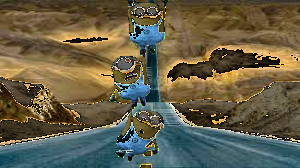

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def adjust_brightness(image, brightness_factor):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # Convert to HSV color space
  hsv[...,2] = hsv[...,2] * brightness_factor # Adjust the V (Value) channel
  return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR) # Convert back to BGR

# Load the image
img = cv2.imread('output_image.png')

# Adjust brightness (e.g., increase by 50%)
brightened_img = adjust_brightness(img, brightness_factor=1.5)

# Display the adjusted image
cv2_imshow(brightened_img)

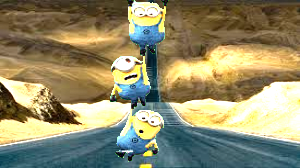

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def adjust_contrast(image, contrast_factor):
    return cv2.addWeighted(image, contrast_factor, np.zeros(image.shape, image.dtype), 0, 0) # Adjust contrast using addWeighted

# Load the image
img = cv2.imread('output_image.png')

# Adjust contrast (e.g., increase by 50%)
contrast_img = adjust_contrast(img, contrast_factor=1.5)

# Display the adjusted image
cv2_imshow(contrast_img)


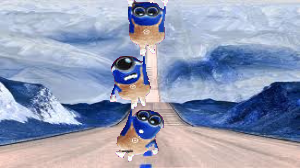

In [6]:

import cv2
from google.colab.patches import cv2_imshow

def invert_image(image):
    return 255 - image  # Subtract pixel values from 255

# Load the image
img = cv2.imread('output_image.png')

# Invert the image
inverted_img = invert_image(img)

# Display the inverted image
cv2_imshow(inverted_img)


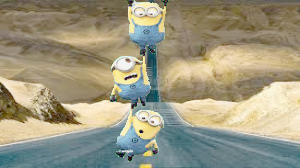

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def apply_gamma_correction(image, gamma):
    # Create a lookup table for gamma correction
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

    # Apply the lookup table to the image
    return cv2.LUT(image, lookUpTable)

# Load the image
img = cv2.imread('output_image.png')

# Apply gamma correction (e.g., gamma = 0.5 to darken)
gamma_corrected_img = apply_gamma_correction(img, gamma=0.5)

# Display the gamma-corrected image
cv2_imshow(gamma_corrected_img)

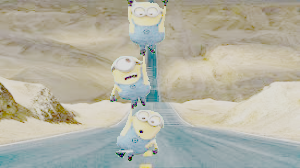

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def apply_log_transformation(image, c):
    # Apply log transformation formula
    log_transformed = c * np.log1p(image)

    # Normalize to 0-255 range
    log_transformed = np.array(log_transformed, dtype=np.uint8)

    return log_transformed

# Load the image
img = cv2.imread('output_image.png')

# Apply log transformation
log_transformed_img = apply_log_transformation(img, c=40)  # Adjust c for desired effect

# Display the log-transformed image
cv2_imshow(log_transformed_img)

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import time

def detect_movement(video_path):

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Read the first frame
    ret, previous_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return

    # Convert the first frame to grayscale
    previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

    while True:
        # Read the next frame
        ret, current_frame = cap.read()
        if not ret:
            break  # End of video

        # Convert the current frame to grayscale
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

        # Calculate the absolute difference between the frames
        frame_diff = cv2.absdiff(previous_frame_gray, current_frame_gray)

        # Threshold the difference image to highlight moving objects
        _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

        # Display the result
        cv2_imshow(thresh)


        time.sleep(0.05)  # Adjust delay if needed


        # Update the previous frame
        previous_frame_gray = current_frame_gray

    # Release the video capture
    cap.release()

# Example usage:
video_path = 'fatima.mp4'  # Replace with your video file path
detect_movement(video_path)

Error: Could not read the first frame.


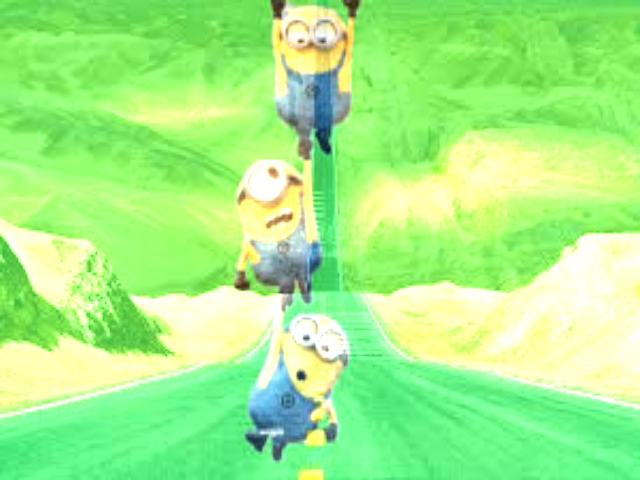

Addition: The result brightens the image by combining pixel values.


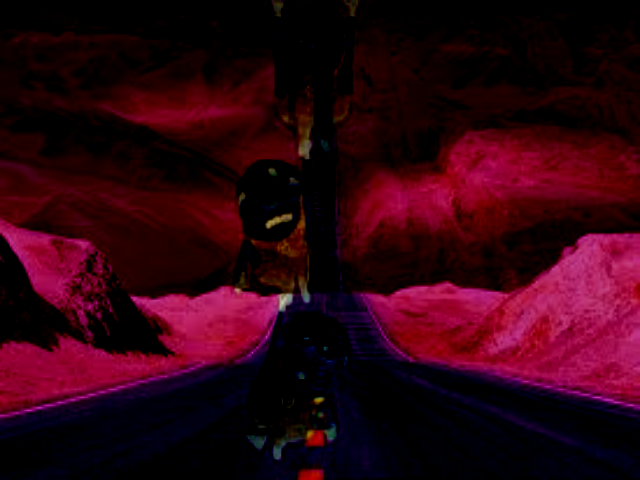

Subtraction: The result darkens the image by subtracting pixel values.


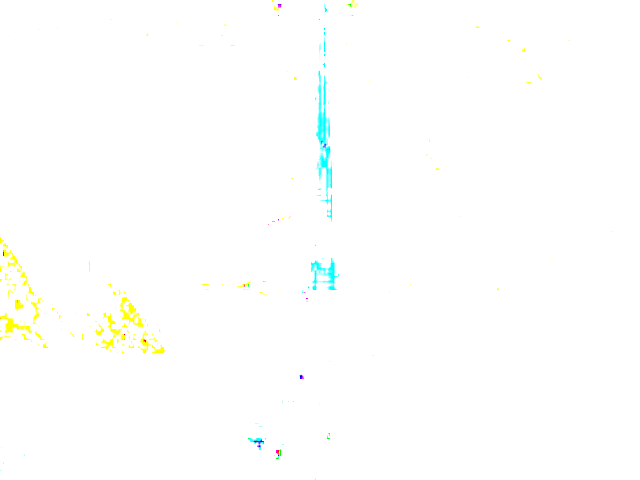

Multiplication: The result increases the intensity by multiplying pixel values.


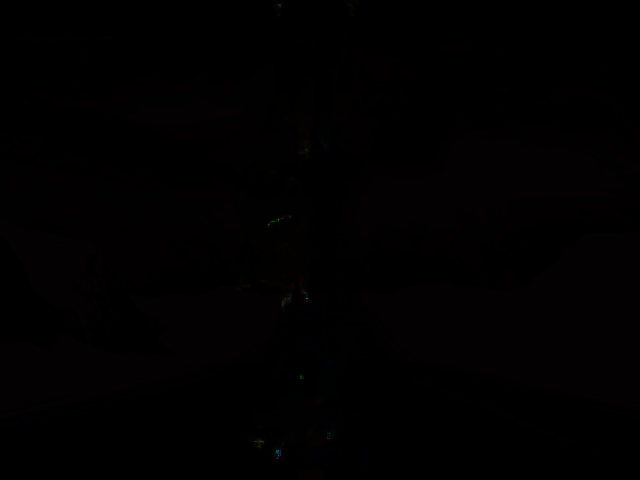

Division: The result decreases the intensity by dividing pixel values.


In [11]:
img1 = cv2.imread('road.jpeg')
img2 = cv2.imread('minion.jpeg')

if img1 is None or img2 is None:
    print("Error: One or both images not found. Please check the paths.")
else:
    img1 = cv2.resize(img1, (640, 480))
    img2 = cv2.resize(img2, (640, 480))

    # a) Addition
    addition_result = cv2.add(img1, img2)
    cv2_imshow(addition_result)
    print("Addition: The result brightens the image by combining pixel values.")

    # b) Subtraction
    subtraction_result = cv2.subtract(img1, img2)
    cv2_imshow(subtraction_result)
    print("Subtraction: The result darkens the image by subtracting pixel values.")

    # c) Multiplication
    multiplication_result = cv2.multiply(img1, img2)
    cv2_imshow(multiplication_result)
    print("Multiplication: The result increases the intensity by multiplying pixel values.")

    # d) Division
    # To avoid division by zero, we add a small constant to img2
    division_result = cv2.divide(img1, img2 + 1)
    cv2_imshow(division_result)
    print("Division: The result decreases the intensity by dividing pixel values.")
